# Representation of signals & inverse problems - G1-G2
---
## Lab 1: Introduction to time-frequency analysis

---
## Guidelines (read carefully before starting)

**Objective**: This practical session consists in a series of 6 short exercises introducting the time-frequency analysis of sounds (acoustic signals).

**Guidelines**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `rsp` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=rsp --file=requirement.txt
    conda activate rsp
    conda deactivate rsp # to deactivate the conda environment
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=rsp
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `rsp`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).
- if needed, an excellent tutorial on the use of Python for scientific computing can be found in the [Scipy lecture notes](https://scipy-lectures.org/).

_Remark: some of the Python modules used in this lab session and in the provided module_ **module_TDS.py** are:

* the `numpy.fft` package, providing implementation of the standard Fourier transforms and related tools:
https://docs.scipy.org/doc/numpy/reference/routines.fft.html
* the `scipy.signal` package, containing several functions to perform various operations on signals:
https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal

## Configuration 

In [1]:
# make sure the notebook reloads the module each time we modify it
%load_ext autoreload
%autoreload 2

# Uncomment the next line if you want to be able to zoom on plots (one of the options below)
#%matplotlib widget
%matplotlib inline

In [2]:
from module_TDS import *

Loading BokehJS ...

In [3]:
from scipy.signal import *
from scipy.io.wavfile import *
from scipy.io import *
from numpy.fft import *
from matplotlib.colors import LogNorm # for Log normalization
import numpy as np
import matplotlib.pyplot as plt

# to install sounddevice library: type the following code in Anacoda prompt window : pip install sounddevice
import sounddevice as sd

## Contents <a id="content"></a>

1. [Section 1](#section1): Fourier analysis (spectral analysis)
   - [Exercise 1](#ex1) 
2. [Section 2](#section2): Fourier analysis of segments
   - [Exercise 2](#ex2) 
   - [Exercise 3](#ex3) 
3. [Section 3](#section3): Introduction to time-frequency analysis 
   - [Exercise 4](#ex4) 
4. [Section 4](#section4): Analysis of some signals
   - [Exercise 5](#ex5) 
   - [Exercise 6](#ex6) 
5. [Appendix](#appendix): Time-frequency atoms using a Hanning window
   - useful code examples

---
## Section 1: Fourier analysis (spectral analysis) <a id="section1"></a> [(&#8593;)](#content)

### Reading, displaying, listening to a signal

#### Reading
Signals can be represented as 1D vectors, stored as a row or a column vector.

You can access the help of a specific Python function by pressing `Maj+Tab+Tab` when the cursor is on the desired function.

Examples of availables sound signals are (see folder `sounds\`):

* bird.wav
* glockenspiel_mono.wav
* aleluya.wav
* desactive_mono.wav
* ...

The following instruction reads a signal from a `.wav` file (song of a bird), before we can listen to it or display it. (see the `sounds\` folder for more examples)

In [4]:
fs, x = read('sounds/bird.wav')

`fs` is the sampling frequency. You can check its value before going on.

#### Listen

In [5]:
sd.play(x,fs)

#### Display

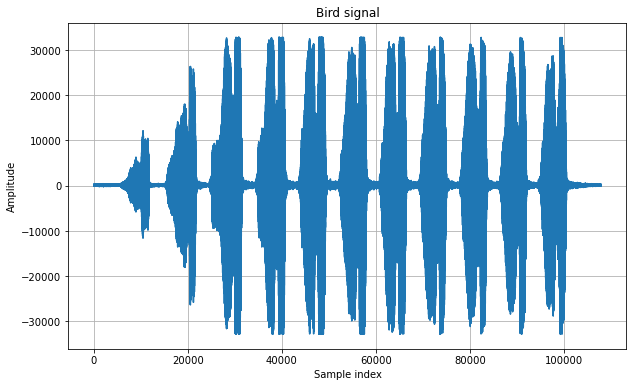

In [6]:
figure(figsize=(10,6))
plot(x)
grid()
xlabel('Sample index')
ylabel('Amplitude')
title('Bird signal')
show()

#### Let's have a look at the time-frequency content of this signal, using its spectrogram (see [Section 3](#Section3)):

<ipython-input-7-5ab47d49d4cc>:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(t, f, Sxx, norm=LogNorm())


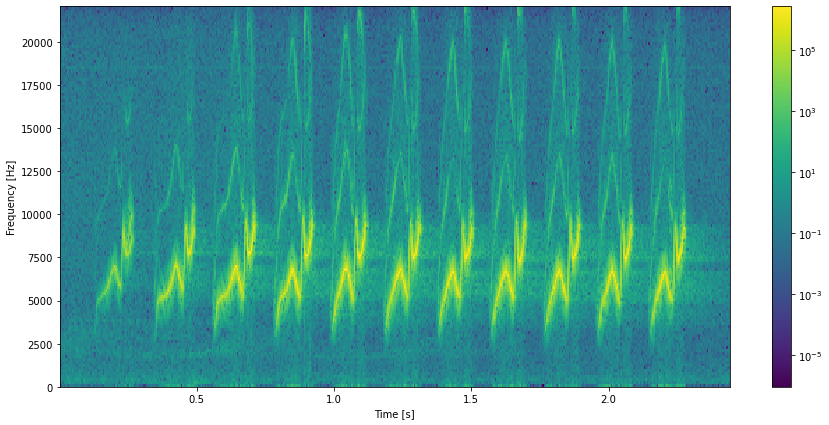

In [7]:
f, t, Sxx = spectrogram(x, fs, nperseg=256)

figure(figsize=(15,7))
pcolormesh(t, f, Sxx, norm=LogNorm())
ylabel('Frequency [Hz]')
xlabel('Time [s]')
colorbar()
show()

One can visualize a small segment of the signal (in the time domain) and observe its oscillatory behaviour:

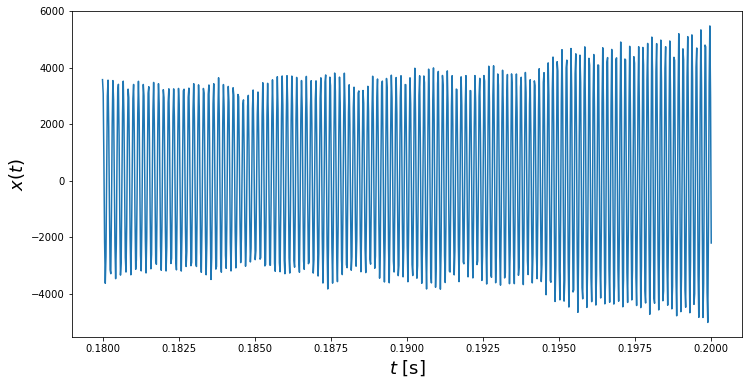

In [8]:
t0 = 0.18   # instant de début du segment considéré
T = 0.02    # durée du signal

t = linspace(t0,t0+T,int(fs*T))  # liste d'instants régulièrement espacés dans T seconde.

figure(figsize=(12,6))

plot(t,x[int(fs*t0):int(fs*(t0+T))])

xlabel(r'$t$ [s]',fontsize=18)
ylabel(r'$x(t)$',fontsize=18)
show()

#### Now consider a limited portion fo the signal, considering only `n` samples:

In [9]:
n = 2**15  # 32768 samples
y = x[:n,]

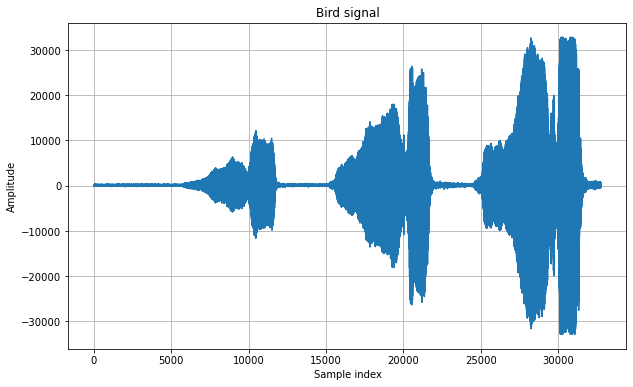

In [10]:
plt.figure(figsize=(10,6))
plot(y)
grid()
xlabel('Sample index')
ylabel('Amplitude')
title('Bird signal')
show()

## Fourier transform of the signal

One can first compute the discrete Fourier transform of the signal and display its modulus to have an idea about the distribution of its energy in the frequency space (remember that $S_x(\nu) = |X(\nu)|^2$ for continous-time signal of finite energy, with $S_x$ the energy spectral density of $x$). 

The frequencies at which the discrete Fourier transform is computed go from $0$ to $(n-1)\frac{fs}{n}$ (with $n$ the number of signal samples), with a regular frequency step $\frac{fs}{n}$:

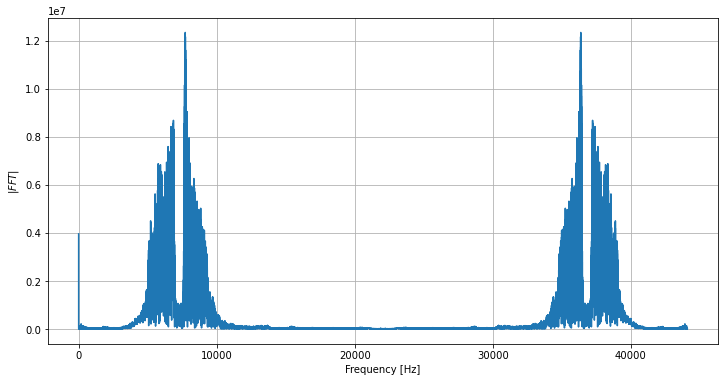

In [11]:
n = 2**15  
xn = x[0:n]

Xf = fft(xn)

freq = arange(0,n*fs/n,fs/n) # list of frequencies associated with the DFT

figure(figsize=(12,6))
plot(freq, abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

In [12]:
freq=fftfreq(n, d=1./fs)
print(freq[0:3])
print(freq[16384-2:16384+2])
print(freq[-3:])

[0.         1.3458252  2.69165039]
[ 22047.30834961  22048.6541748  -22050.         -22048.6541748 ]
[-4.03747559 -2.69165039 -1.3458252 ]


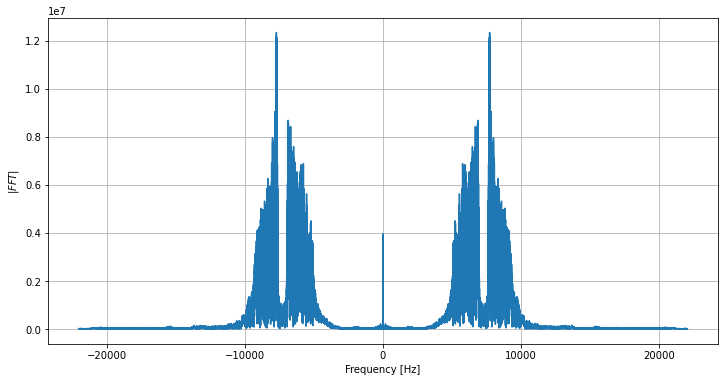

In [13]:
x_f = fftshift(fft(xn))

#freq= arange(-fs/2,fs/2, fs/n) # symmetrical vector of frequencies
freq = fftshift(fftfreq(n, d=1./fs))   # scipy function

figure(figsize=(12,6))
plot(freq,abs(x_f))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

### Exercise 1 <a id="ex1"></a> [(&#8593;)](#content)
1. What is the value of the sampling frequency `fs` used above? What does it correspond to?
2. What are the characteristic frequencies of the bird song studied here?

#### Question 1

The sampling frequency is the frequency with which the signal is sampled. It is easier to understand with the sampling periode which is the time interval between each point we take from the analogic signal for the numerical representation.

Here we have a sampling frequency of 44.1 kHz which is a standard for audio files. This value is due to Shannon's Sampling Theorem which states that the sampling frequency has to be strictly superior than the highest frequency of the signal. For an audio signal, this highest value is around 20000Hz.

#### Question 2

The characteristic frequencies of the bird song are the highest peaks of the FFT. Here, we have two ranges of frequencies : between 5000Hz and 6850Hz and between 7700Hz and 9300Hz.

We could highlight some of these characteritic frequencies :

- 6500 Hz
- 7700 Hz

In order to better analyse these frequencies, another method would be required to compare results, one that provide information based on each frequency.

The Fourier transform only gives access to a global information on the frequency content of the signal. A "local" Fourier analysis would be useful to have a more precise description of the sound, such as local amplitude and local frequency variations (local in the temporal domain). 

#### Local oscillations of a signal

A sound is usually a locally oscillating, quasi-stationary signal. We illustrate this property by looking more closely at different segments of the signal (in the time domain).

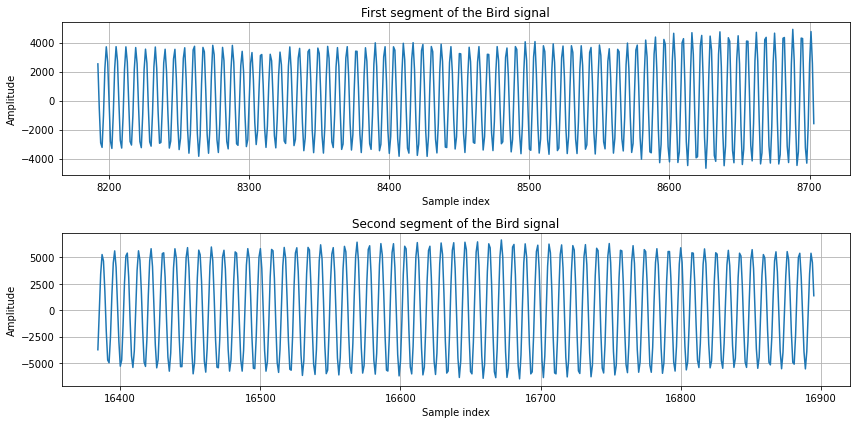

In [14]:
# t = arange(n)/fs # list of times considered
t = np.arange(0,n,1)
p = 512       # number of samples of a piece of signal


figure(figsize=(12,6))
##
sel = int(n/4) + np.arange(0,p)  # list of times considered
subplot(211)  # first piece
plot(t[sel],y[sel])
xlabel('Sample index')
ylabel('Amplitude')
title('First segment of the Bird signal')
grid()

##
sel = int(n/2) + np.arange(0,p)  # list of a subset of instants
subplot(212)  # second piece
plot(t[sel],y[sel])
xlabel('Sample index')
ylabel('Amplitude')
title('Second segment of the Bird signal')
grid()
tight_layout()
show()

---
## Section 2 : Fourier analysis of segments <a id="section2"></a> [(&#8593;)](#content)

**Objective:** this section will guide you to compute the Fourier transform of various segments of the signal (centered around time instants `tk`), and represent its modulus to illustrate the variations of the local frequency content of the signal across time. Detailed steps are reported at the end of this section.

To this aim, we will consider the Fourier transform (use the `fft` & `fftshift` functions) of segments of the signal `w*x`, where `w` is a window function centered in `tk`. One can use for instance a Gaussian window containing $2N+1$ samples, with $N=400$ and a standard deviation $\sigma = 200$.
    
**Indication :** to build a Gaussian window, **use the function `get_window`**. Useful code examples are given below, along 

**Note:** you should always have $n_0> N$, where $n_0$ denotes the index of a time instant of interest.

In [15]:
t=np.arange(0,x.size)/fs # list of times considered

n0=10000   # corresponds to instant (n0-1)/fs in time
#t0 = (n0-1)/fs  # instant of interest

N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

Displaying the window as a function of the sample index

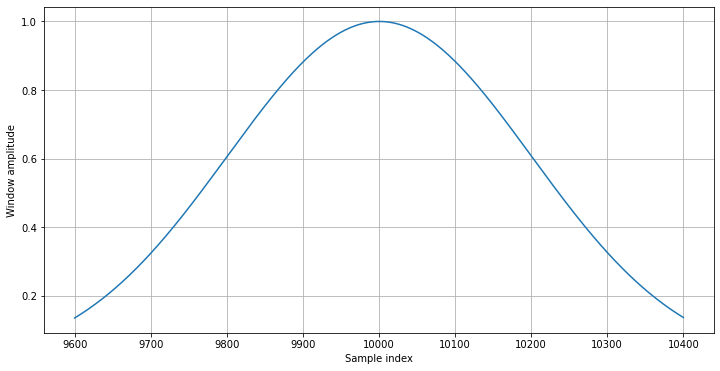

In [16]:
figure(figsize=(12,6))
plot(sel,gauss_win)
xlabel('Sample index')
ylabel('Window amplitude')
grid()
show()

Displaying the window as a function of time:

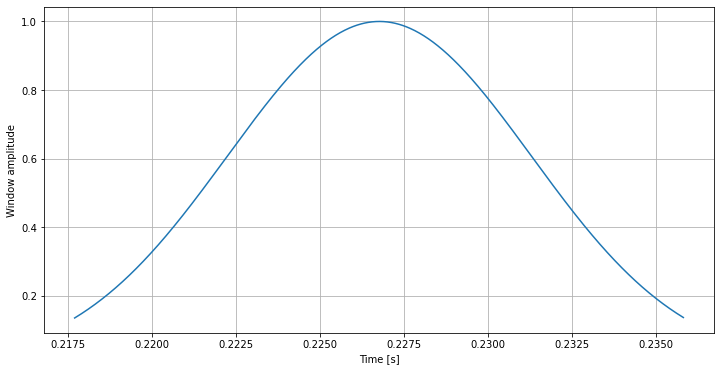

In [17]:
figure(figsize=(12,6))
plot(t[sel],gauss_win)
xlabel('Time [s]')
ylabel('Window amplitude')
grid()
show()

We extract the signal segment taken for local Fourier analysis, and multiply it by the Gaussian window centered at $n_0$ (corresponding to time $t_0 = (n_0-1)/fs$:

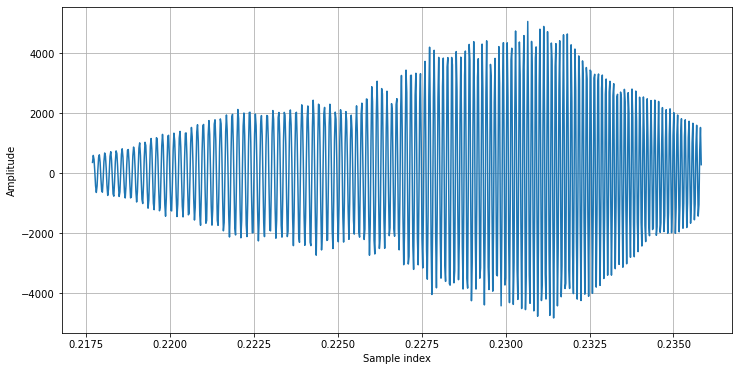

In [18]:
x_segment = gauss_win*xn[sel]

figure(figsize=(12,6))
plot(t[sel],x_segment)
xlabel('Sample index')
ylabel('Amplitude')
grid()
show()

We compute and display the amplitude spectrum of the segment:

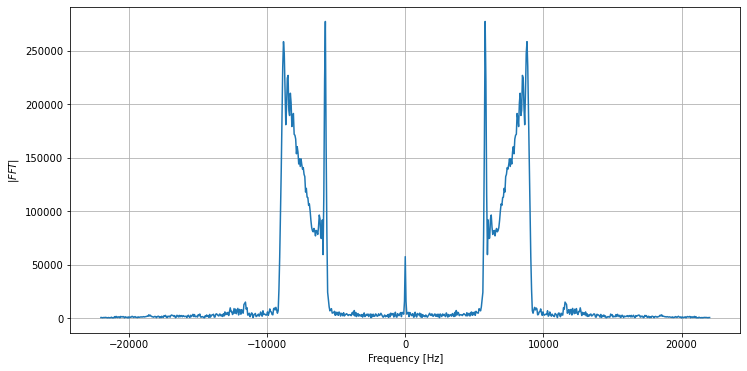

In [19]:
Xf = fftshift(fft(x_segment)) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function

figure(figsize=(12,6))
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
grid()
show()

### Exercice 2 <a id="ex2"></a> [(&#8593;)](#content)

#### Question 1

In [20]:
# Question 1

N0 = np.arange(1000, 11000, 1000)
T0 = N0/fs


N=400      # half width of the analysing window

L = 2*N+1 ;   # number of samples considered per segment 

sigma=200    # standard deviation of the Gaussian window

gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);

x_segment = gauss_win*x[sel]

In [21]:
# Question 1
N0

array([ 1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,  9000,
       10000])

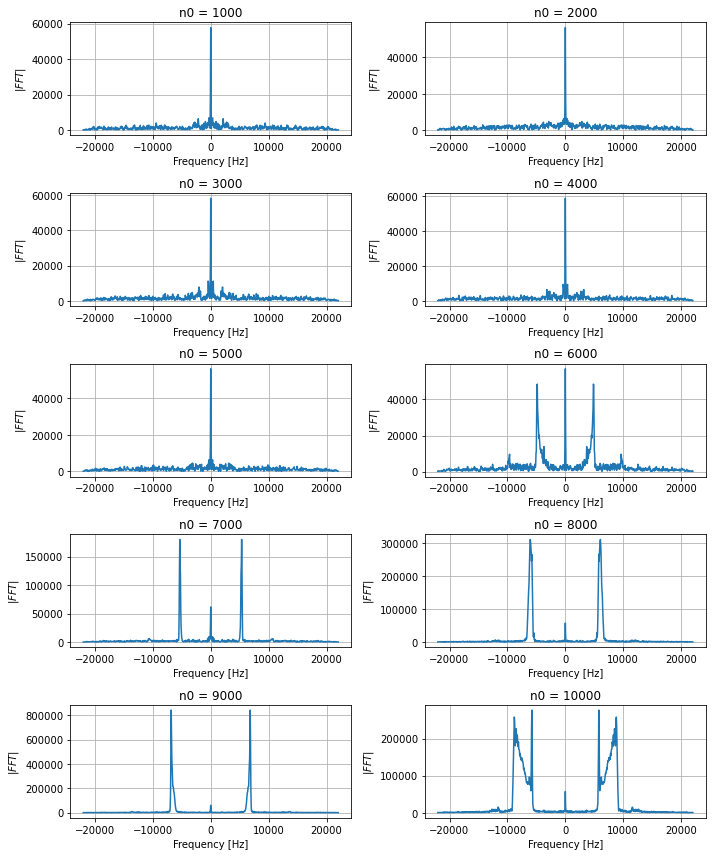

In [22]:
# Question 1
i=0
figure(figsize=(10,12))
for n0 in N0:
    sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment
    x_segment = gauss_win*x[sel]
    i+=1
    Xf = fftshift(fft(x_segment)) 
    # freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function
    subplot(5,2,i)
    plot(freq,abs(Xf))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    title('n0 = ' + str(n0))
    grid()
tight_layout()
show()

#### Question 2

Until we reach n0=6000, there is just noise in the Fourier Transform. From 6000Hz to 10000Hz, we can see a peak (and its symmetric with respect to the y axis because of the shift) corresponding to the characteristic frequency of the segment of the signal.
The maximum amplitude is higher as we approach n0=9000.

#### Question 3

The segmented analysis highlights that the majority of the information (the energy) of the signal is contained in a small portion of the whole signal. We may only use this portion (between n0=6000 and n0=10000) for analysis purposes so that we do not take some part of the noise into account.

#### Question 4

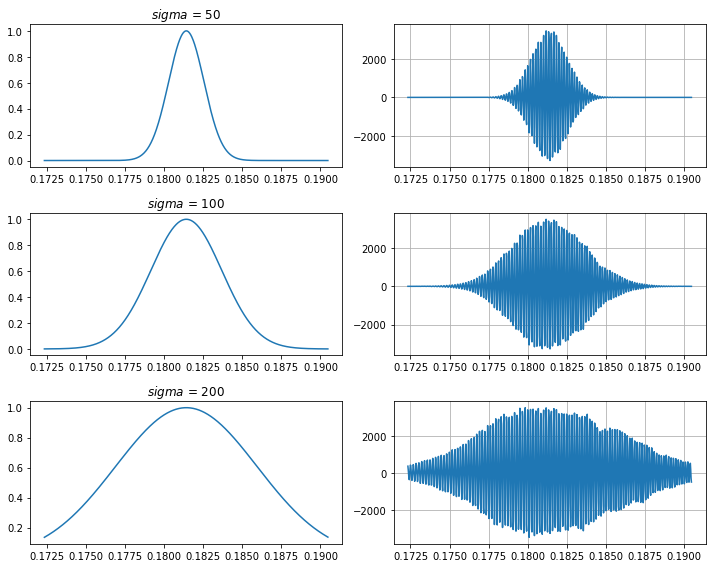

In [23]:
# Question 4

sigma = [50, 100, 200]
i=1
n0 = 8000
figure(figsize=(10,8))
for sigma in sigma:
    sel = arange(n0-N,n0+N+1,1)# sample indices of the selected segment
    gauss_win = get_window(('gaussian', sigma), L)
    x_segment = gauss_win*x[sel]
    Xf = fftshift(fft(x_segment)) 
    # freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function
    subplot(3,2,i)
    title('$sigma$ = ' + str(sigma))
    plot(t[sel],gauss_win)
    subplot(3,2,i+1)
    plot(t[sel], x_segment)
    grid()
    i+=2
tight_layout()
show()

#### Question 5

<ipython-input-24-25bba17d0b39>:14: RuntimeWarning: divide by zero encountered in log10
  gauss_decib = 20*np.log10(gauss_freq)
<ipython-input-24-25bba17d0b39>:14: RuntimeWarning: invalid value encountered in multiply
  gauss_decib = 20*np.log10(gauss_freq)
C:\Users\mrtho\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-24-25bba17d0b39>:14: RuntimeWarning: divide by zero encountered in log10
  gauss_decib = 20*np.log10(gauss_freq)
<ipython-input-24-25bba17d0b39>:14: RuntimeWarning: invalid value encountered in multiply
  gauss_decib = 20*np.log10(gauss_freq)
C:\Users\mrtho\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\mrtho\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting 

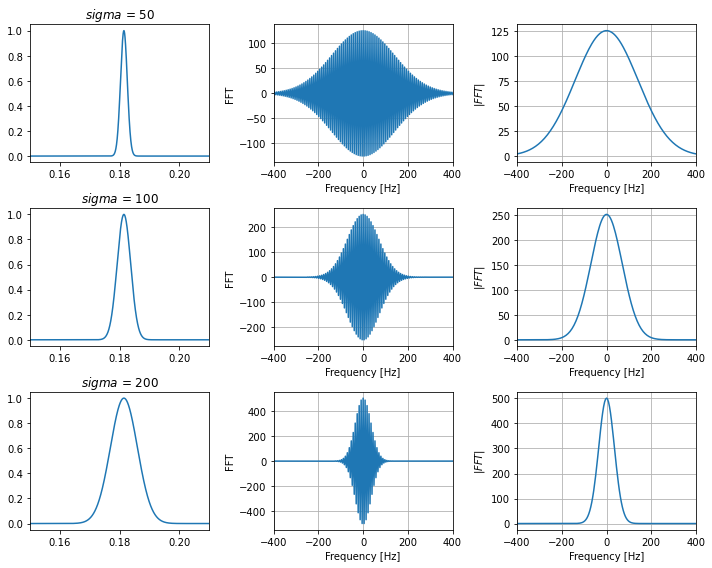

In [24]:
# Question 5

sigma = [50, 100, 200]
i=1
n0 = 8000
N=5000      
L = 2*N+1

figure(figsize=(10,8))
for sigma in sigma:
    sel = arange(n0-N,n0+N+1,1)
    gauss_win = get_window(('gaussian', sigma), L)
    gauss_freq = fftshift(fft(gauss_win))
    gauss_decib = 20*np.log10(gauss_freq)
    freq = fftshift(fftfreq(gauss_freq.size, d=1./fs))
    
    subplot(3,3,i)
    title('$sigma$ = ' + str(sigma))
    xlim((0.150,0.210))
    plot(t[sel],gauss_win)
    
    subplot(3,3,i+1)
    plot(freq, gauss_freq)
    xlim((-400,400))
    xlabel('Frequency [Hz]')
    ylabel('FFT')
    grid()
    
    subplot(3,3,i+2)
    plot(freq, np.abs(gauss_freq))
    xlim((-400,400))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    grid()
    
    i+=3
tight_layout()
show()

We can clearly see that : the wider the time gaussian window is, the tighter the corresponding spectrum is.
This highlights the Heisenberg's uncertainty principle which states that sigma_t.sigma_nu >= 1/4*pi.

For the gaussian window, the inequality is saturating and the inequality becomes an equality.

#### Question 6

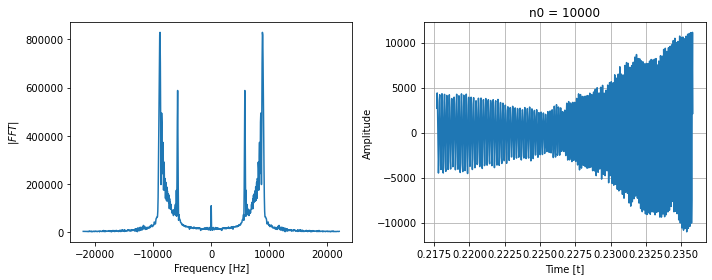

In [27]:
# Question 6

n0 = 10000
N = 400
L = 2*N +1
figure(figsize=(10,4))
sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment
x_segment = x[sel]
i+=1
Xf = fftshift(fft(x_segment)) 
# freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function
subplot(1,2,1)
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
subplot(1,2,2)
plot(t[sel], x_segment)
xlabel('Time [t]')
ylabel('Amplitude')
title('n0 = ' + str(n0))
grid()
tight_layout()

We can highlight two main peaks :
- 5700 Hz
- 8800 Hz

The difference with the Fourier transform of the whole signal is that, we have less noise in the frequency domain.

#### Question 7

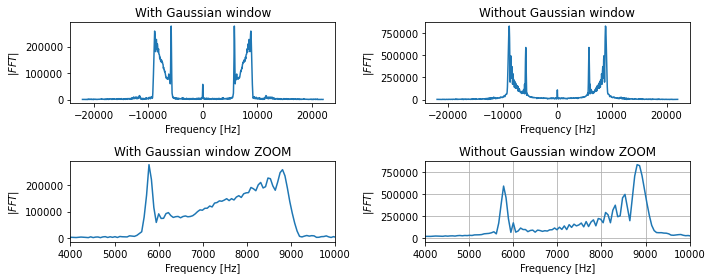

In [28]:
# Question 7

sigma = 200
n0 = 10000
figure(figsize=(10,4))
sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment

gauss_win = get_window(('gaussian', sigma), L)
x_segment = gauss_win*x[sel]

Xf = fftshift(fft(x_segment)) 
freq = fftshift(fftfreq(Xf.size, d=1./fs))

Xf_without_win = fftshift(fft(x[sel])) 
freq = fftshift(fftfreq(Xf_without_win.size, d=1./fs))

subplot(2,2,1)
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('With Gaussian window')


subplot(2,2,2)
plot(freq, abs(Xf_without_win))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Without Gaussian window')

subplot(2,2,3)
plot(freq,abs(Xf))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('With Gaussian window ZOOM')
xlim((4000,10000))

subplot(2,2,4)
plot(freq, abs(Xf_without_win))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Without Gaussian window ZOOM')
xlim((4000,10000))

grid()
tight_layout()

The Gaussian window acts like a low pass filter over the segmented signal. It cuts the high frequencies so it is better to apply it as it eliminates the noise of the signal we are analysing.
But, we see that we lose the original amplitude of the signal : the time-frequency analysis with a gaussian window is lowering the frequencies amplitude, so we should adjust our window to be able to read correctly the frequency part of our signal.

#### Question 8

In [29]:
#Question 8
gauss_win = get_window(('gaussian', sigma), L)
sigma = 200
Nk = np.arange(11000, 21000, 1000)
Nk

array([11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000,
       20000])

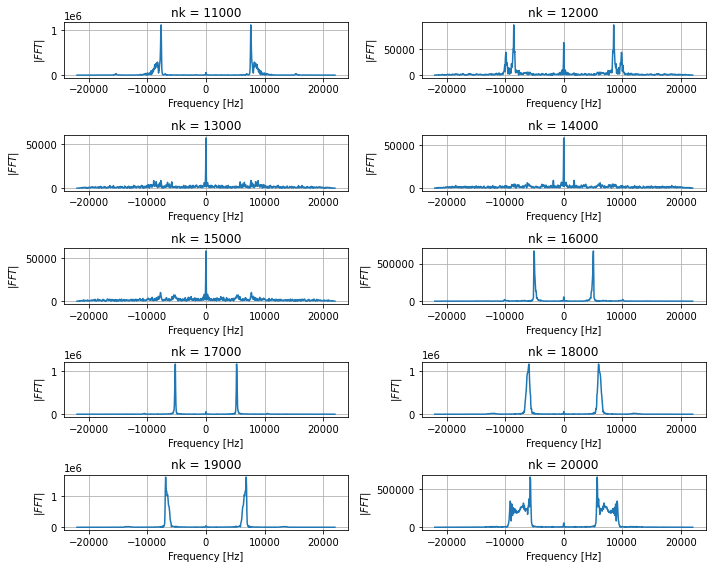

In [32]:
#Question 8

i=0
figure(figsize=(10,8))
for nk in Nk:
    sel = arange(nk-N,nk+N+1,1)  # sample indices of the selected segment
    x_segment = gauss_win*x[sel]
    i+=1
    Xf = fftshift(fft(x_segment)) 
    # freq = arange(-fs/2,fs/2,fs/L)  # or see line below: 
    freq = fftshift(fftfreq(Xf.size, d=1./fs))    # scipy function
    subplot(5,2,i)
    plot(freq,abs(Xf))
    xlabel('Frequency [Hz]')
    ylabel(r'$| FFT |$')
    title('nk = ' + str(nk))
    grid()
tight_layout()
show()

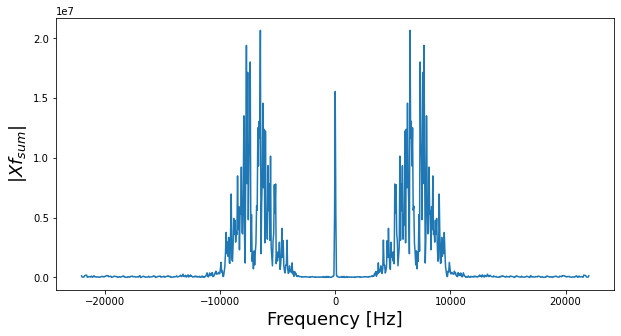

In [33]:
# Indication to sum several spectra from successive segments
# freq = arange(-Fe/2,Fe/2,Fe/L), equivalent to :
freq = fftshift(fftfreq(Xf.size, d=1./fs))

# initialization of Xf_sum
n0 = N
sel = arange(n0-N,n0+N+1,1)       # indices of the samples composing the selected segment
x_segment = gauss_win*x[sel]
Xf_sum = fftshift(fft(x_segment)) 

for n0 in arange(N,len(x)-L,N):   # loop over successive segments, spaced by L samples
    sel = arange(n0-N,n0+N+1,1)   # indices of the samples composing the selected segment
    x_segment = gauss_win*x[sel]
    Xf_sum += fftshift(fft(x_segment)) 

figure(figsize=(10,5))
plot(freq,abs(Xf_sum))
xlabel('Frequency [Hz]',fontsize=18)
ylabel(r'$|Xf_{sum}|$',fontsize=18)
show()    

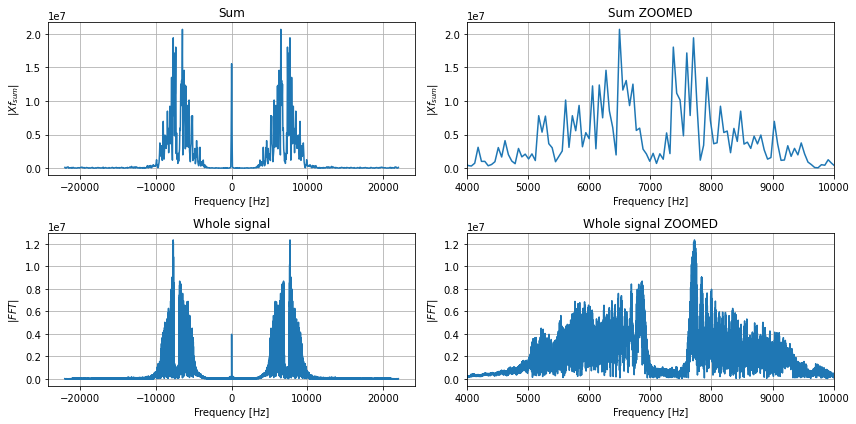

In [34]:
# Question 9

freq = fftshift(fftfreq(Xf.size, d=1./fs))

# initialization of Xf_sum
n0 = N
sel = arange(n0-N,n0+N+1,1)       # indices of the samples composing the selected segment
x_segment = gauss_win*x[sel]
Xf_sum = fftshift(fft(x_segment)) 

for n0 in arange(N,len(x)-L,N):   # loop over successive segments, spaced by L samples
    sel = arange(n0-N,n0+N+1,1)   # indices of the samples composing the selected segment
    x_segment = gauss_win*x[sel]
    Xf_sum += fftshift(fft(x_segment)) 

figure(figsize=(12,6))

subplot(2,2,1)
plot(freq,abs(Xf_sum))
xlabel('Frequency [Hz]')
ylabel(r'$|Xf_{sum}|$')
title('Sum')
grid()

subplot(2,2,2)
plot(freq,abs(Xf_sum))
xlabel('Frequency [Hz]')
ylabel(r'$|Xf_{sum}|$')
title('Sum ZOOMED')
grid()
xlim((4000,10000))

x_f = fftshift(fft(xn))

#freq= arange(-fs/2,fs/2, fs/n) # symmetrical vector of frequencies
freq = fftshift(fftfreq(n, d=1./fs))   # scipy function

subplot(2,2,3)
plot(freq,abs(x_f))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Whole signal')
grid()

subplot(2,2,4)
plot(freq,abs(x_f))
xlabel('Frequency [Hz]')
ylabel(r'$| FFT |$')
title('Whole signal ZOOMED')
grid()
xlim((4000,10000))

tight_layout()
show()

With the sum of the different spectrum, it is easier to analyse the spectrum as we have less noise. 
We have a higher mean value for the sum than for the whole signal because we add all the mean value of every segment of the signal we take.

### A dynamic plot of the Short-Time Fourier Transform

In [35]:
# !!!! DO NOT MODIFY THIS CELL !!!! 
from bokeh.layouts import row, column

#t=np.arange(0,xn.size)/fs # list of times considered

def fft_segment(k=1):
    
    fs = 44100
    n0=k*500
    N=200
    L = 2*N+1 ;                  # number of samples considered per segment
    sel = arange(n0-N,n0+N+1,1)  # sample indices of the selected segment
    sigma=100
    gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
    
    x_segment = gauss_win*xn[sel]
    Xf = fftshift(fft(x_segment)) 
    
    xs = [[(n0-N)/fs, (n0-N)/fs], [(n0+N)/fs, (n0+N)/fs]]
    M = max(abs(xn))
    ys =[[-M, M]]*2
    
    window_line.data_source.data = dict(xs=xs, ys=ys)
    rx.data_source.data = dict(x=t[sel],y=x_segment)
    rX.data_source.data['y'] = abs(Xf)
    push_notebook()
    

fig_xn = bkfigure(title = 'x', plot_height=200, plot_width=600)
fig_x = bkfigure(title = 'x_segment', plot_height=200, plot_width=300)
fig_X = bkfigure(title = '| FFT [x_segment] |', plot_height=200, plot_width=300)

fs = 44100
n0 = 500
N=200
L = 2*N+1 ;   
sel = arange(n0-N,n0+N+1,1)  
sigma=100
gauss_win = get_window(('gaussian', sigma), L) # 1/sqrt(2*pi*sigma**2)*exp(-(sel-n0)**2/2/sigma**2);
x_segment = gauss_win*xn[sel]
Xf = fftshift(fft(x_segment)) 
freq = fftshift(fftfreq(Xf.size, d=1./fs))   
# freq = arange(-Fe/2,Fe/2,Fe/L)

# !!!! DO NOT MODIFY THIS CELL !!!! 

In [36]:
# EXECUTE THE PREVIOUS CELL THEN THE CELL TO START THE INTERACTIVE VISUALIZATION
# plot of the original signal xn
t=np.arange(0,xn.size)/fs # list of times considered

M = max(abs(xn))
rxn = fig_xn.line(t,xn) #,color = "red")
window_line = fig_xn.multi_line(xs = [[(n0-N)/fs, (n0-N)/fs], [(n0+N)/fs, (n0+N)/fs]],ys =[[-M, M]]*2,color="firebrick",line_width=2)
# plots of the segement and its Fourier transform
rx = fig_x.line(t[sel], x_segment) #,color = "red")
rX = fig_X.line(freq, abs(Xf)) #,color = "red")

bkshow(column(children=[fig_xn, row(fig_x, fig_X)]), notebook_handle=True)
interact(fft_segment, k=(1,65));

interactive(children=(IntSlider(value=1, description='k', max=65, min=1), Output()), _dom_classes=('widget-int…

### Exercise 3 <a id="ex3"></a> [(&#8593;)](#content)
1. Move the cursor above to explore the signal in time and frequency

2. Comment on your observations.

#### Question 2

For $k<12$ the signal is mostly noise and we can see that with the Fourier Transform which does not have clear harmonics for this segment.

For $11<k<24$ we see a characteristic frequency band between 6000 Hz and 10000 Hz appears.

For some part of the signal (k=23 for example), we can see two peaks close together around 9000 Hz. The signal in this segment is really close to a product of sinus.

As we go through all the segments, we clearly see that the window allow us to better make sense of the information. In particular, for the noisy parts, we see that the signal is composed of stationary amplitude for the most part.

---
## Section 3: Introduction to time-frequency analysis <a id="section3"></a> [(&#8593;)](#content)

### Short-Time Fourier Transform: spectrogram & reconstruction

In [37]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/bird.wav')
y = x[0:n]

#sd.play(y,fs)   

Computing the STFT transform of the signal:

In [38]:
width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=spacing-width)

**Indication:** A logarithmic scale is used to display the spectrogram amplitude.
In addition, the times and frequencies at which the spectrogram is observed are given by

    nf, nw = S[0].size, S[1].size
    T = n/Fe
    t_stft = arange(0,nw)*T/spacing
    f_stft = arange(0,nf/2)*Fe/width

**Graphical representation of an analysis window**

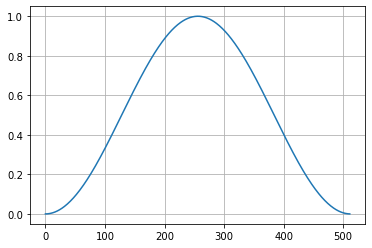

In [39]:
figure()
w = hann(M=512);
w=get_window('hann', width)
plot(w)
grid()

**Graphical representation of the spectrogram**:
you can either choose the STFT modulus calculated above, or use the `spectrogram` function which calculates the square of its modulus (due to the energy conservation theorem for the STFT).

<ipython-input-40-655a003c00d8>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())


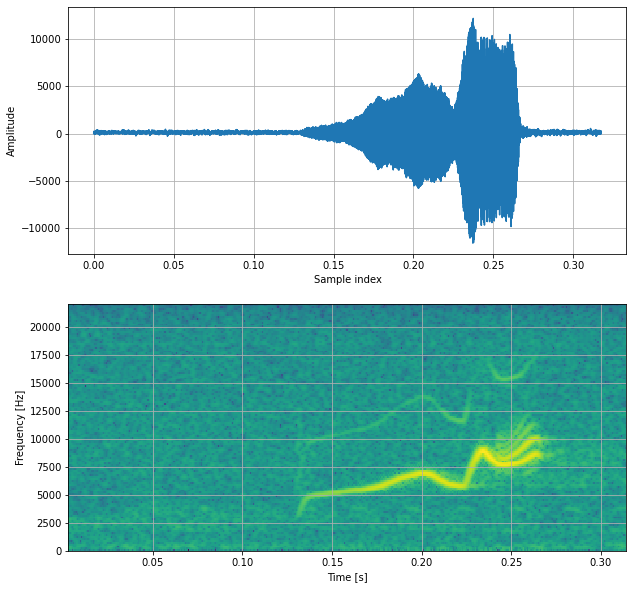

In [40]:
figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t[0:n],y) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(y, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
#colorbar()
show()

### Exercice 4 <a id="ex4"></a> [(&#8593;)](#content)
1. Explain how the horizontal and vertical axes of the
spectrogram have been indexed and discretized. How should one read and interpret them? 

**Indication :** _for the frequency axis, consider the number of time samples (number of analyzed segments) represented. For the frequency axis, we have the resolution of the discrete Fourier transform of a discrete signal of length `width` (length of the analysis window), sampled at the frequency $f_s$._ 

2. Plot the spectrograms of the `glockenspiel_mono.wav` and `desactive_mono.wav` sounds.
provided  in the `sounds\` folder. Observe and comment.

3. The functions `stft` and `spectrogram` call for an optional parameter 
`window='hann'`. Play with various windows and compare the resulting spectrograms.

**Online codcumentation at**
https://docs.scipy.org/doc/scipy/reference/signal.html#window-functions

#### Question 1

The horizontal and vertical axis of the spectrogram have been discretised with a sliding window (Hann window here) which is a generator of time-frequency atoms that discretises the time-frequency plan into Gabor-Heisenberg boxes with dimension sigma_t et sigma_nu.

#### Question 2

In [41]:
# Question 2

n = 14000; # length of the extracted vector
fs, x = read('sounds/glockenspiel_mono.wav')
y = x[0:n]

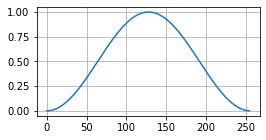

In [42]:
figure(figsize = (4,2))
w = hann(M=512);
w=get_window('hann', width)
plot(w)
grid()

In [43]:
width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=spacing-width)

<ipython-input-44-9e1769568aad>:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())


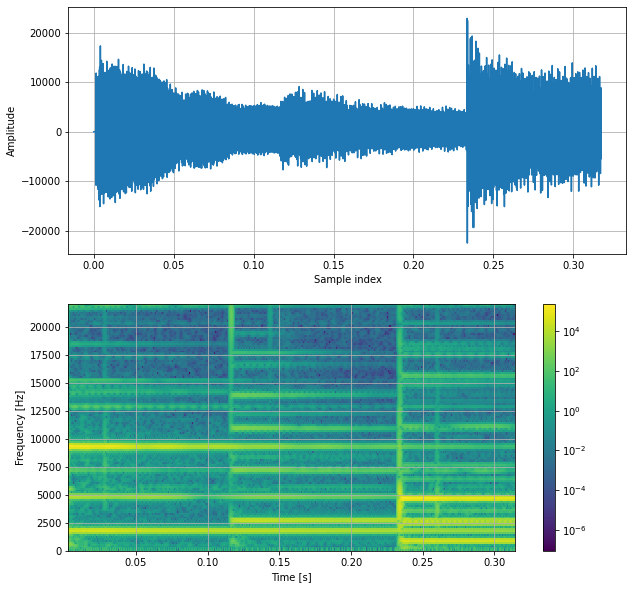

In [44]:
figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t[0:n],y) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(y, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

<ipython-input-45-33b212edf264>:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())


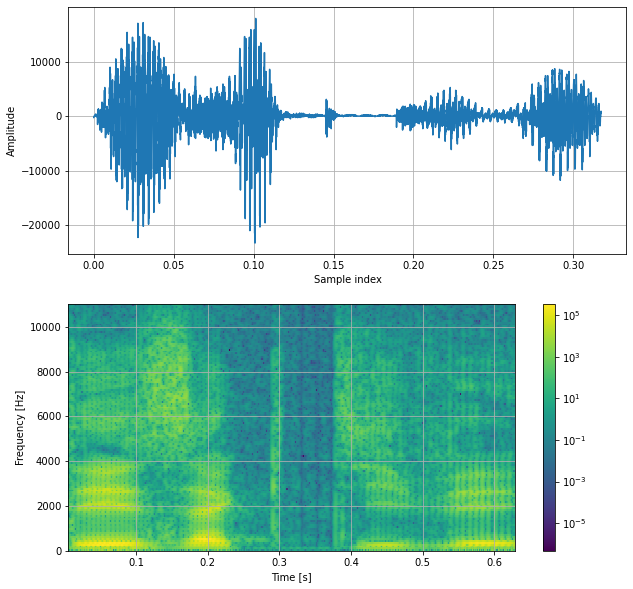

In [45]:
n = 14000; # length of the extracted vector
fs, x = read('sounds/desactive_mono.wav')
y = x[0:n]

width=512;         # window width
spacing=width/8;   # number of samples between 2 successive segments
window = 'hann';   # window used

t_stft, f_stft, x_stft = stft(x, fs=1.0, window='hann', nperseg=width, noverlap=spacing-width)

figure(figsize=(10,10))

# The signal in time domain
subplot(211)
plot(t[0:n],y) 
ylabel('Amplitude')
xlabel('Sample index')
grid()

# Time frequency representation
#figure(figsize=(12.7,6))
subplot(212)
width = 256  # we usually use a power of 2
spacing = width/8
f_Sy, t_Sy, Sy = spectrogram(y, fs, window='hann', nperseg=width, noverlap=width-spacing)
ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

<ipython-input-46-dee9b6dc10a2>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
<ipython-input-46-dee9b6dc10a2>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
<ipython-input-46-dee9b6dc10a2>:40: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X 

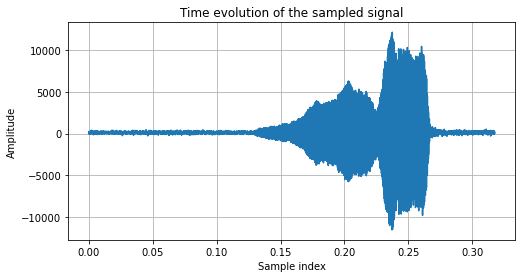

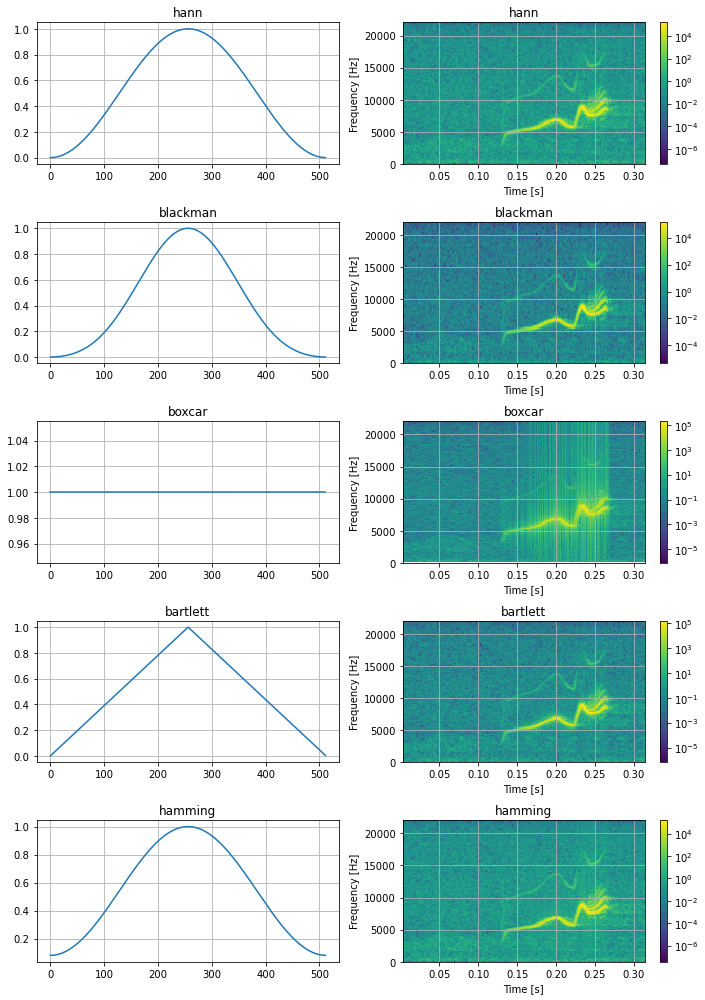

In [46]:
# Question 3

windows = ['hann', 'blackman', 'boxcar', 'bartlett', 'hamming']

n = 14000; # length of the extracted vector
fs, x = read('sounds/bird.wav')
y = x[0:n]

figure(figsize=(8,4))

# The signal in time domain
plot(t[0:n],y) 
ylabel('Amplitude')
xlabel('Sample index')
title('Time evolution of the sampled signal')
grid()

figure(figsize=(10,14))
i=1
for window in windows:
    width=512;         # window width
    spacing=width/8;   # number of samples between 2 successive segments
    window = window;   # window used

    t_stft, f_stft, x_stft = stft(x, fs=1.0, window=window, nperseg=width, noverlap=spacing-width)
    
    w = hann(M=512);
    w=get_window(window, width)
    subplot(5,2,i)
    plot(w)
    title(window)
    grid()
    
    # Time frequency representation
    #figure(figsize=(12.7,6))
    subplot(5,2,i+1)
    width = 256  # we usually use a power of 2
    spacing = width/8
    f_Sy, t_Sy, Sy = spectrogram(y, fs, window=window, nperseg=width, noverlap=width-spacing)
    ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
    ylabel('Frequency [Hz]')
    xlabel('Time [s]')
    title(window)
    grid()
    colorbar()
    i+=2
tight_layout()
show()

---
## Section 4: Analysis of some signals <a id="section4"></a> [(&#8593;)](#content)

### Exercise 5 <a id="ex5"></a> [(&#8593;)](#content)
Consider the signal `x` stored in the `signal_2sinus.mat` loaded below, sampled at $f_s =4096$.

1. Study this signal and his spectrogram with a window of your choice. To this aim, you may observe the spectrogram for different windows and widths, for instance `width=64`, `128, 256, 512, 1024`. Which choice of window and width allows the 2 frequencies present in this signal to be properly distinguished? (justify)

2. What is the content of this signal ? Try to be as precise as possible in your description, including characteristic frequencies. Comment and explain these results.  

<ipython-input-63-0b46cc93fbb0>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  xlabel(r'$t$ [s]',FontSize=18)
<ipython-input-63-0b46cc93fbb0>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ylabel(r'$x(t)$',FontSize=18)


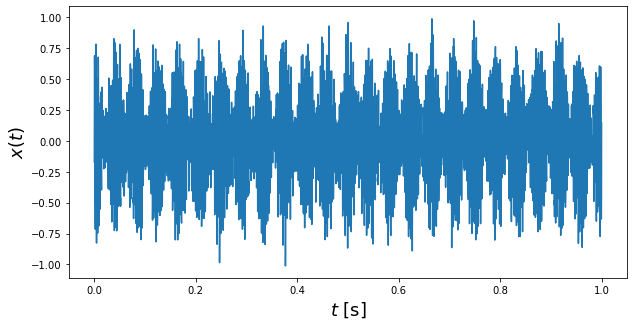

In [63]:
# Load signal x
data = loadmat('signal_2sinus.mat') # load the signal x and the list of sampling time instants (sampling frequency Fe)

t = data['t'][0]
x = data['x'][0]
fs = data['Fe'][0][0]

figure(figsize=(10,5))
plot(t,x)
xlabel(r'$t$ [s]',FontSize=18)
ylabel(r'$x(t)$',FontSize=18)
show()

# Listen
sd.play(x,fs)

#### Question 1

In [66]:
#Question 1
widths = [128,256,512,1024]
window = 'hann'
fs = 4096
y = x

<ipython-input-62-550bc55a34ef>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
<ipython-input-62-550bc55a34ef>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm())
<ipython-input-62-550bc55a34ef>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X 

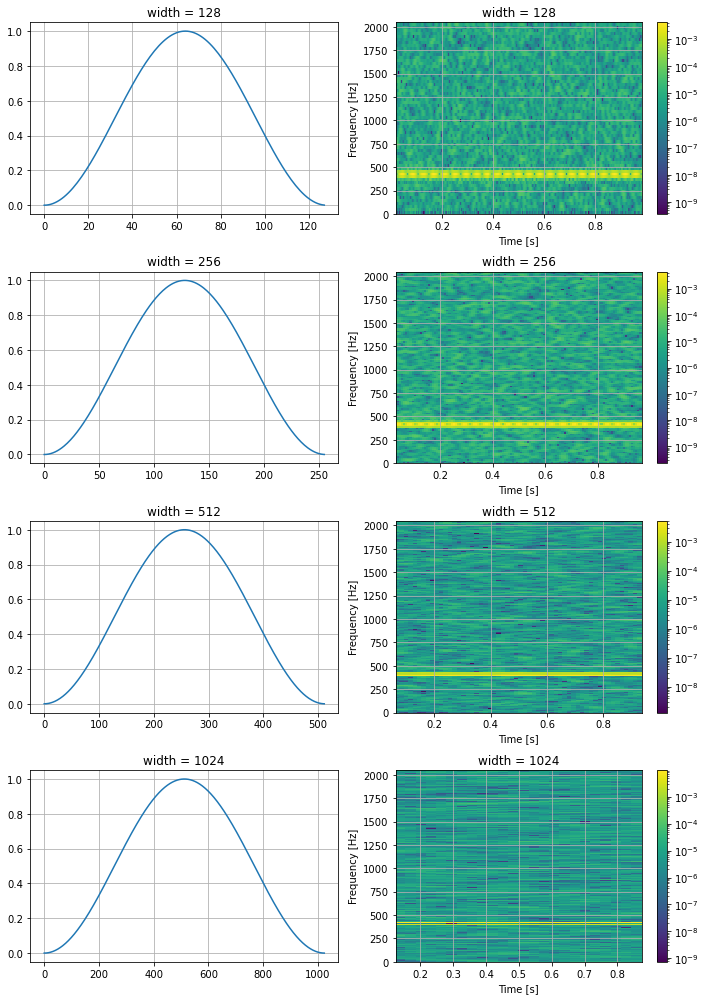

In [62]:
figure(figsize=(10,14))
i=1
y = x
for width in widths:
    width=width        # window width
    spacing=width/8;   # number of samples between 2 successive segments
    window = window;   # window used

    t_stft, f_stft, x_stft = stft(y, fs=fs, window=window, nperseg=width, noverlap=spacing-width)
    
    w=get_window(window, width)
    subplot(4,2,i)
    plot(w)
    title('width = '+str(width))
    grid()
    
    subplot(4,2,i+1)
    width = width 
    spacing = width/8
    f_Sy, t_Sy, Sy = spectrogram(y, fs, window=window, nperseg=width, noverlap=width-spacing)
    
    ax=pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) 
    ylabel('Frequency [Hz]')
    xlabel('Time [s]')
    title('width = '+str(width))
    grid()
    colorbar()
    i+=2
tight_layout()
show()

We can distinguish the two frequencies in the signal with a 'Hann Window' of width equal to 1024 (as we can see in the cell above).
The reason why we need a large window is because of Heisenberg's uncertainty principle : to separate the two characteristic frequencies that are close together in terms of frequency, we should have a low variance for the frequency. Hence, we have a large variance for the time window. 

#### Question 2

With the large time window, we see the two characteristic frequencies :
- 402Hz
- 426Hz

Then we have two straight lines in the spectrogram which is characteric of a sinusoidal signal. So, it looks like we have two sinusoids in this signal.

### Time-frequency analysis of hyperbolic chirps

In this section, we consider the superposition of 2 "chirps", *i.e.*, signals whose frequency varies continuously, in a hyperbolic way (see the help of the `chirp` function in Python). As a result, we face a resolution problem, since the width of the window is constant for the entire signal, and may thus not be suitable for all the time instants.

The ultrasonic cries produced by bats typically have a similar structure, as well as gravitational waves observed in astrophysics.

In [67]:
#chirp(t, f0, t1, f1[, method, phi, vertex_zero])	Frequency-swept cosine generator.
fs = 4096
T = 3
f1_min, f1_max = 200, 1600
f2_min, f2_max = 250, 1650

t = linspace(0, 3, fs*T) 
y1 = chirp(t,f1_min,T,f2_max,method = 'hyperbolic')
y2 = chirp(t,f2_min,T,f2_max,method = 'hyperbolic')
y = y1+y2

sd.play(y,fs)   # let's play the sound

<ipython-input-68-00b679aa6e51>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies


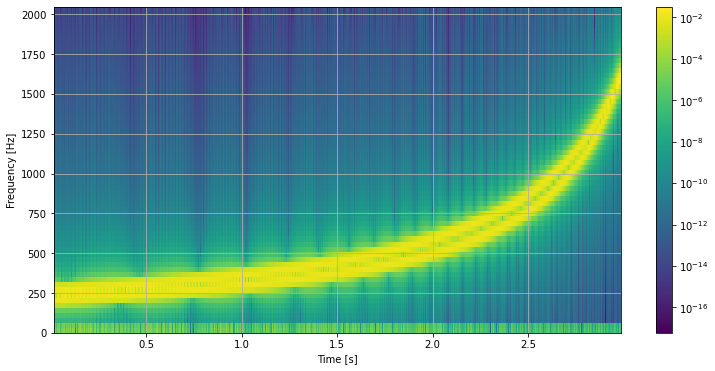

In [68]:
width = 128
window = get_window('hann',width)

figure(figsize=(12.7,6))
f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=7*width/8)
pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

### Exercice 6 <a id="ex6"></a> [(&#8593;)](#content)

1. Observe the results obtained by the above analysis. What is the nature of this signal?
2. Observe the quality of the spectrogram using different windows. Modify the width of the window, and highlight situations where the spectrogram allows or doesn't allow the different components of the signal to distinguished.

#### Question 1

This is an audio signal with a frequency evolution with respect to time which is hyperbolic : the begining is low-pitched and the end of the signal has a high pitch. 

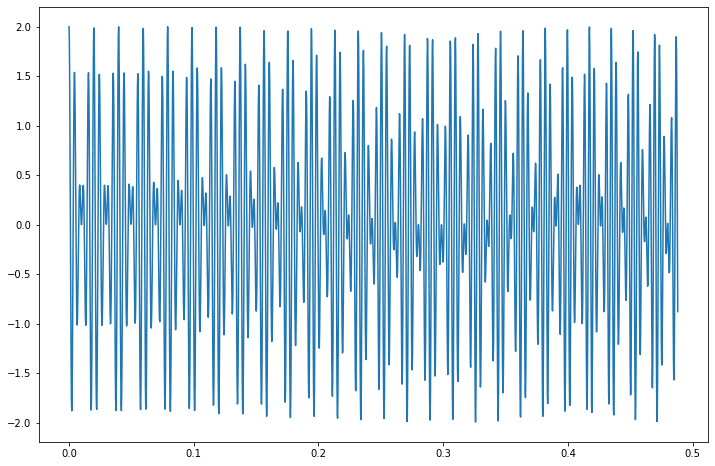

In [69]:
# Question 1
figure(figsize=(12,8))
n = 2000
y_segment = y[0:n]
plot(t[0:n],y_segment)
show()

<ipython-input-70-ea9de98af779>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies


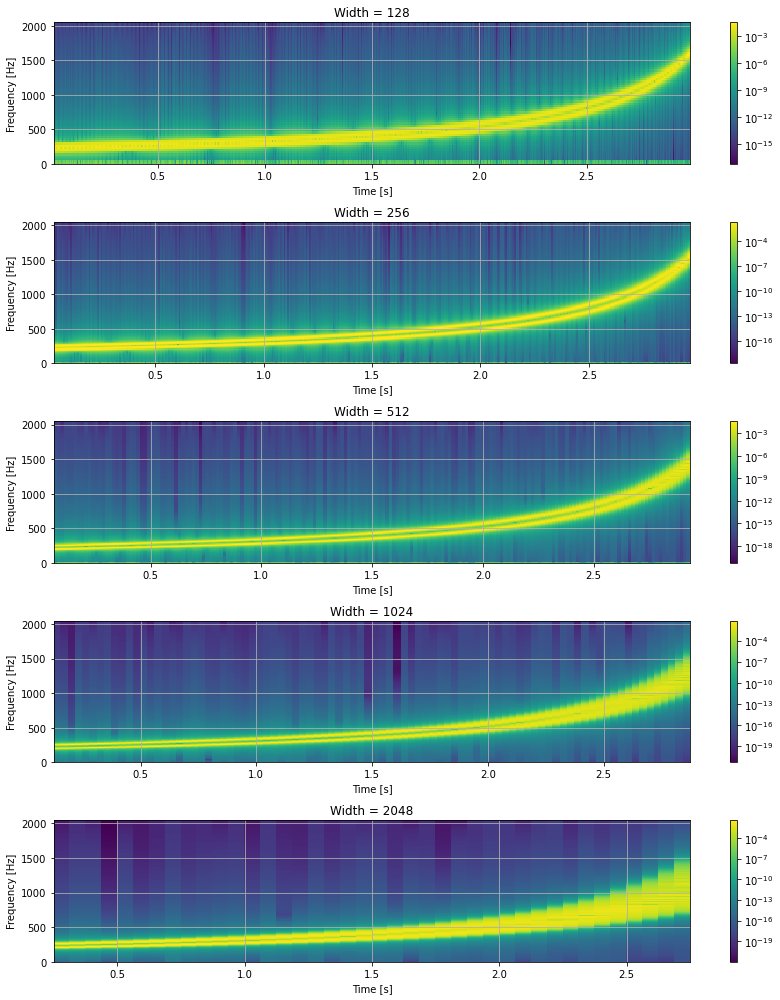

In [70]:
# Question 2


widths = [128, 256, 512, 1024, 2048]

figure(figsize=(12,14))
i=1
for width in widths:
    window = get_window('hann',width)

    f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=7*width/8)
    subplot(5,1,i)
    pcolormesh(t_Sy, f_Sy, Sy, norm=LogNorm()) # the top of the spectrogram corresponds to the high frequencies
    ylabel('Frequency [Hz]')
    xlabel('Time [s]')
    title('Width = '+str(width))
    grid()
    colorbar()
    i+=1
tight_layout()
show()

We can see that the two characteritic frequencies of the signal are hard to distinguish at the beginning of the signal (t low) with a narrow window. Respectively, we have the same problem for the end of the signal (t high) with a wide window.
A window of width 256 seems to allow us to distinguish the two frequencies of the signal during the entire range of time.

Maybe we could use an adaptating window that enlarge itself as time increases to solve this problem.

## Appendix: time-frequency atoms using the Hanning window <a id="appendix"></a> [(&#8593;)](#content)

Each coefficient of the STFT could be seen as the scalar product of the signal of interest and a time-frequency atom. Atoms are obtained by shifting the basic window into time and frequency (amplitude modulation). We represent here some atoms obtained from the Hanning window.

Examples of atoms using Hann's window: observe the effect of translations in time and frequency.

In [55]:
w = 256 # 
fs = 1024 # sampling frequency

t = arange(-w/2,3*w-1,1)/fs # set of reference instants for atom at 0
t1 = 0.4 #t[-1]-1.3*w/fs    # set of instants for 2 * w translated atom
f = 8/w*fs # frequency different from zero in g3 to g6

# Position 0, frequency 0 (measures the contribution of a local offset
g1 = (cos(pi*t*fs/w)**2)*double(abs(t)<w/fs/2)
                            
# Position t1, frequency 0
g2 = (cos( pi*(t-t1)*fs/w )**2)*double( abs(t-t1)<w/fs/2 )  

# Position 0, frequency f
g3 = g1 * cos(2*pi*f*t) # frequency translation <=> amplitude modulation

# Position t1, frequency f
g4 = g2 * cos(2*pi*f*t)

# Position 0, frequency 2*f
g5 = g1 * cos(2*pi*2*f*t)

# Position t1, frequency 2*f
g6 = g2 * cos(2*pi*2*f*t)

#### Displaying the windows

In [52]:
figure(figsize=(15,6))

pos=('0', 't1', '0', 't1', '0', 't1')
fr = ('0', '0', 'f', 'f', '2f', '2f')

for i in range(6):
    subplot(3,2,i+1)
    eval('plot(t,g' + str(i+1) + ')')
    title('Position ' + pos[i]+', frequency ' + fr[i])
    grid()
    
tight_layout()
show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### In the time-frequency plane for an atom at time $t_1$ and frequency $10f$ :

Atoms above are easy to represent graphically but not easy to listen to. Let's increase the frequency up to an audible level of a few hundred Hz:

In [53]:
y = g2 * cos(2*pi*10*f*t)

#### What does an atom sound like? Let's listen to `y`:

In [54]:
sd.play(y,fs)

#### What does an atom look like in the time-frequency plane ?

In [55]:
width = 128
window = get_window('hann',width)

figure(figsize=(10,6))
f_Sy, t_Sy, Sy = spectrogram(y, fs=fs, window=window, nperseg=width, noverlap=15*width/16)
pcolormesh(t_Sy, f_Sy, log10(Sy+1e-6)) # the top of the spectrogram then corresponds to the high frequencies
ylabel('Frequency [Hz]')
xlabel('Time [s]')
grid()
colorbar()
show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

<ipython-input-55-baef24de3f5a>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  pcolormesh(t_Sy, f_Sy, log10(Sy+1e-6)) # the top of the spectrogram then corresponds to the high frequencies
